In [ ]:
"""
    The AR is is utilized to do linear regression over a same variable, this is mainly utilized in
    time series because doing linear regression with respect to time not always is a good idea. We can 
    use AR when we have that kind of problems and we need to do linear regression.
"""

In [19]:
# libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# load the temperatures dataset
data = pd.read_csv('daily-min-temperatures.csv')
data.head() 


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


(3650, 1)


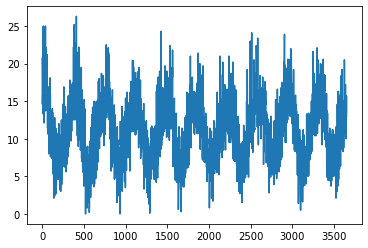

In [21]:
x = np.asanyarray(data[['Temp']]) # column vector of temperatures, we ignore te time variable
print(x.shape)
plt.plot(x)                        # plot the temperatures


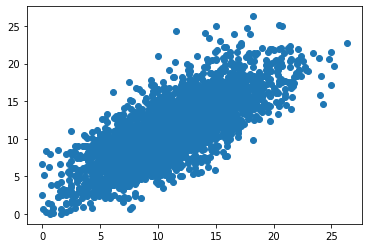

In [22]:
p = 1   # lag of days. More lag: less correlation, less lag: more correlation
plt.scatter(x[p:], x[:-p]) # dispersion graph with 'p' lag days

In [23]:

# correlation coeficient of 'p' days of lag
np.corrcoef(x[p:].transpose(), x[:-p].transpose())

# 1: total correlation 
# 0: no correlation 
# -1: inverse correlation


array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

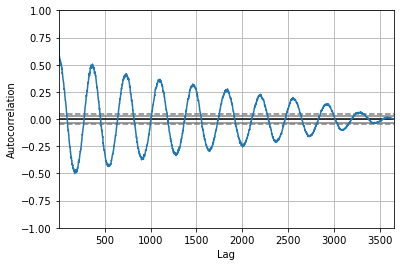

In [24]:
# autocorrelation plot of the temperature series

"""
The graph shows how correlated the variable is with itself but with lags: 
one day lag, 2 days lag, 3, ... n
"""


pd.plotting.autocorrelation_plot(data.Temp)

In [25]:
## we ar going to create the dataset for doing linear regression (AR in this case) ###

# copying all original dataset
data2 = pd.DataFrame(data.Temp)

p=5 # lag 
for i in range(1, p+1): 
    # this concatenates the columns of original dataset till the number of lags we defined
    data2 = pd.concat([data2, data.Temp.shift(-i)], axis=1)
data2 = data2[:-p]

print(data2.shape)
data2.head()

(3645, 6)


,Temp,Temp,Temp,Temp,Temp,Temp
0,20.7,17.9,18.8,14.6,15.8,15.8
1,17.9,18.8,14.6,15.8,15.8,15.8
2,18.8,14.6,15.8,15.8,15.8,17.4
3,14.6,15.8,15.8,15.8,17.4,21.8
4,15.8,15.8,15.8,17.4,21.8,20.0


In [26]:
# create x, y
x = np.asanyarray(data2.iloc[:,1:]) # x: beginning from column 1
y = np.asanyarray(data2.iloc[:,0])  # y: it's the column 0

from sklearn.model_selection import train_test_split # function to split the dataset 
xtrain,xtest,ytrain,ytest = train_test_split(x, y)   # split into training and testing datasets

from sklearn.linear_model import LinearRegression # linear regression model

# create the model and train it
model = LinearRegression()
model.fit(xtrain, ytrain)


print('Score Train: ',model.score(xtrain, ytrain)) # training score 
print('Score Test: ', model.score(xtest,ytest))    # test score 

Score Train:  0.6341200002683783
Score Test:  0.6245842646674455
